In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df_reviews = pd.read_csv('datasets/bike_reviews.csv')

/var/folders/l1/654hn8x929xgr948720kzdk80000gn/T/ipykernel_47751/3210371667.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('datasets/bike_reviews.csv')


In [31]:
# Drop rows with missing values
data_cleaned = df_reviews.dropna()

# Display the shape of the cleaned data
print(f'Cleaned data shape: {data_cleaned.shape}')

Cleaned data shape: (46, 4)


In [32]:
# Review the data types
data_types = data_cleaned.dtypes
print(data_types)

# 'Product_Model' is not needed for analysis
data_relevant = data_cleaned.drop(columns=['Product_Model'], errors='ignore')

# Display the remaining columns
print(data_relevant.columns)

Customer_ID      float64
Product_ID       float64
Product_Model     object
Rating           float64
dtype: object
Index(['Customer_ID', 'Product_ID', 'Rating'], dtype='object')


In [33]:
similar_users = data_relevant[data_relevant['Rating'] > 3]

print(similar_users)

    Customer_ID  Product_ID  Rating
1        1045.0      2100.0     4.0
2        1045.0      2101.0     5.0
3        1046.0      1101.0     4.0
5        1046.0      2102.0     4.0
6        1047.0      1102.0     5.0
7        1047.0      2100.0     4.0
10       3797.0      2100.0     5.0
12       3797.0      2102.0     4.0
19       3266.0      1100.0     5.0
20       3266.0      2100.0     4.0
21       3266.0      2101.0     4.0
22       1773.0      1104.0     5.0
23       1773.0      2102.0     4.0
25       7868.0      1102.0     5.0
26       7868.0      2100.0     4.0
27       7868.0      2104.0     4.0
29       3357.0      1100.0     5.0
30       3357.0      2100.0     4.0
31       3357.0      2101.0     5.0
32       1277.0      1105.0     5.0
33       1277.0      2100.0     4.0
35       8184.0      1101.0     4.0
36       8184.0      2104.0     4.0
37       8184.0      2101.0     5.0
38       3559.0      1103.0     4.0
39       3559.0      2100.0     4.0
40       3559.0      2101.0 

In [ ]:
# Calculate the percentage of users who rated each product above 3
all_users_liked = data_relevant.groupby('Product_ID')['Rating'].apply(lambda x: (x > 3).mean() * 100).reset_index()
all_users_liked.columns = ['Product_ID', 'Liked_Percentage']

print(all_users_liked)

    Product_ID  Liked_Percentage
0       1100.0         66.666667
1       1101.0        100.000000
2       1102.0        100.000000
3       1103.0         50.000000
4       1104.0         66.666667
5       1105.0         50.000000
6       2100.0         90.000000
7       2101.0         55.555556
8       2102.0         60.000000
9       2103.0          0.000000
10      2104.0         50.000000
11      2105.0          0.000000


In [38]:
# Calculate the count of similar users per Product_ID
similar_users_count = similar_users.groupby('Product_ID').size().reset_index(name='Similar_Users_Count')

# Merge similar users count with all users liked percentage
comparison_df = pd.merge(similar_users_count, all_users_liked, on='Product_ID', how='outer').fillna(0)

# Display the comparison dataframe
print(comparison_df)

    Product_ID  Similar_Users_Count  Liked_Percentage
0       1100.0                  2.0         66.666667
1       1101.0                  2.0        100.000000
2       1102.0                  2.0        100.000000
3       1103.0                  1.0         50.000000
4       1104.0                  2.0         66.666667
5       1105.0                  1.0         50.000000
6       2100.0                  9.0         90.000000
7       2101.0                  5.0         55.555556
8       2102.0                  3.0         60.000000
9       2103.0                  0.0          0.000000
10      2104.0                  2.0         50.000000
11      2105.0                  0.0          0.000000


In [40]:
# Affinity Score = Similar_Users_Count * (Liked_Percentage / 100)
comparison_df['Affinity_Score'] = comparison_df['Similar_Users_Count'] * (comparison_df['Liked_Percentage'] / 100)

print(comparison_df)

    Product_ID  Similar_Users_Count  Liked_Percentage  Affinity_Score
0       1100.0                  2.0         66.666667        1.333333
1       1101.0                  2.0        100.000000        2.000000
2       1102.0                  2.0        100.000000        2.000000
3       1103.0                  1.0         50.000000        0.500000
4       1104.0                  2.0         66.666667        1.333333
5       1105.0                  1.0         50.000000        0.500000
6       2100.0                  9.0         90.000000        8.100000
7       2101.0                  5.0         55.555556        2.777778
8       2102.0                  3.0         60.000000        1.800000
9       2103.0                  0.0          0.000000        0.000000
10      2104.0                  2.0         50.000000        1.000000
11      2105.0                  0.0          0.000000        0.000000


In [43]:
# Load the CSV file
df_catalogue = pd.read_csv('datasets/bike_catalogue.csv')

# Merge the comparison dataframe with the catalogue dataframe
merged_df = pd.merge(comparison_df, df_catalogue, on='Product_ID', how='left')

print(merged_df)

    Product_ID  Similar_Users_Count  Liked_Percentage  Affinity_Score  \
0       1100.0                  2.0         66.666667        1.333333   
1       1101.0                  2.0        100.000000        2.000000   
2       1102.0                  2.0        100.000000        2.000000   
3       1103.0                  1.0         50.000000        0.500000   
4       1104.0                  2.0         66.666667        1.333333   
5       1105.0                  1.0         50.000000        0.500000   
6       2100.0                  9.0         90.000000        8.100000   
7       2101.0                  5.0         55.555556        2.777778   
8       2102.0                  3.0         60.000000        1.800000   
9       2103.0                  0.0          0.000000        0.000000   
10      2104.0                  2.0         50.000000        1.000000   
11      2105.0                  0.0          0.000000        0.000000   

     Product_Model     Category       Price  In_st

In [46]:
# Sort by Affinity Score and Liked Percentage in descending order
item_recommendation_list = merged_df.sort_values(by=['Affinity_Score', 'Liked_Percentage'], ascending=False)

# Select specific columns for clarity
item_recommendation_list = item_recommendation_list[['Product_ID', 'Product_Model', 'Category', 'Price', 'Affinity_Score', 'Liked_Percentage']]

print(item_recommendation_list)

    Product_ID   Product_Model     Category       Price  Affinity_Score  \
6       2100.0          U Lock  Accessories      48.00         8.100000   
7       2101.0          Helmet  Accessories      42.00         2.777778   
1       1101.0     Hybrid Bike       Street   3,093.47         2.000000   
2       1102.0    Folding Bike       Street   4,247.99         2.000000   
8       2102.0  Front Mudguard  Accessories      26.00         1.800000   
0       1100.0         Cruiser     Off Road     318.32         1.333333   
4       1104.0             BMX     Off Road   3,941.44         1.333333   
10      2104.0     Front Light  Accessories      12.00         1.000000   
3       1103.0   Mountain Bike     Off Road   1,722.01         0.500000   
5       1105.0   Electric Bike       Street   2,707.40         0.500000   
9       2103.0   Rear Mudguard  Accessories      32.00         0.000000   
11      2105.0      Rear Light  Accessories      14.00         0.000000   

    Liked_Percentage  
6

In [53]:
highest_recommendation_list = item_recommendation_list[['Product_ID', 'Product_Model', 'Price']].drop_duplicates(subset='Product_ID')

print(highest_recommendation_list.head())

   Product_ID   Product_Model       Price
6      2100.0          U Lock      48.00 
7      2101.0          Helmet      42.00 
1      1101.0     Hybrid Bike   3,093.47 
2      1102.0    Folding Bike   4,247.99 
8      2102.0  Front Mudguard      26.00 


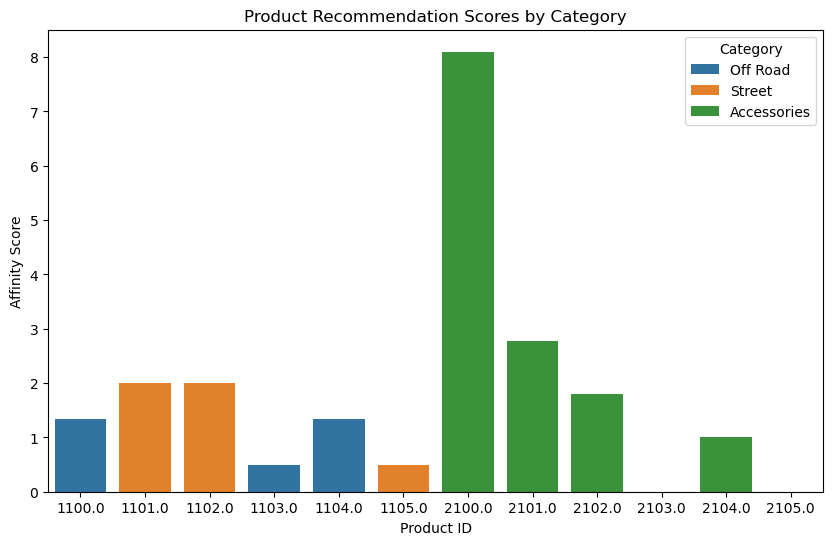

In [52]:
# Plot Affinity Score distribution for each Product
plt.figure(figsize=(10, 6))
sns.barplot(data=item_recommendation_list, x='Product_ID', y='Affinity_Score', hue='Category')
plt.title('Product Recommendation Scores by Category')
plt.xlabel('Product ID')
plt.ylabel('Affinity Score')
plt.legend(title='Category')
plt.show()